In [21]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


In [22]:
path = 'E:/NeuroNerds/NeuroNerds-AdEvaluator/Project Data/Attention Data.csv'

In [23]:
data = pd.read_csv(path)
data

,TimeStamp,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_AF8,Theta_TP10,Alpha_TP9,...,Gyro_X,Gyro_Y,Gyro_Z,HeadBandOn,HSI_TP9,HSI_AF7,HSI_AF8,HSI_TP10,Battery,Class
0,24:15.3,0.751643,1.137732,1.241092,0.434002,0.432456,0.364035,1.142506,0.530501,1.093901,...,6.624451,-3.529053,-0.755157,1.0,1.0,1.0,1.0,1.0,55.0,High
1,24:15.8,0.751643,1.137732,1.299211,0.434002,0.432456,0.364035,1.170195,0.530501,1.093901,...,5.121613,-4.157104,-2.130890,1.0,1.0,1.0,1.0,1.0,55.0,High
2,24:16.3,0.751643,1.156090,0.558158,0.434002,0.432456,0.287083,0.384314,0.530501,1.093901,...,5.016937,-3.671112,-2.871094,1.0,1.0,1.0,1.0,1.0,55.0,High
3,24:16.8,0.796775,0.867685,0.994092,0.549118,0.868472,0.103581,0.368374,0.769166,1.216370,...,5.854340,-5.502930,-0.964508,1.0,1.0,1.0,1.0,1.0,55.0,High
4,24:17.3,0.775548,0.786956,1.083485,0.519082,0.784558,0.210304,0.384292,0.788158,1.221839,...,5.473022,-4.164581,-2.392578,1.0,1.0,1.0,1.0,1.0,55.0,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11838,06:45.8,0.986110,0.480529,0.591422,0.967558,0.809593,0.611749,0.669541,0.818000,0.651132,...,3.177643,-2.758942,-1.674805,1.0,1.0,1.0,1.0,1.0,30.0,Low
11839,06:46.4,0.905541,-0.027661,0.190887,0.845574,0.728109,-0.141964,0.108015,0.762140,0.710771,...,4.478607,-2.983246,-0.209351,1.0,1.0,1.0,1.0,1.0,30.0,Low
11840,06:46.9,0.927426,0.148461,0.143809,0.309474,0.745079,0.011965,0.044464,0.503118,0.743957,...,3.641205,-9.899292,-2.452393,1.0,1.0,1.0,1.0,1.0,30.0,Low
11841,06:47.4,0.859555,0.190864,0.118321,0.143381,0.669280,0.088193,-0.052259,0.404191,0.702878,...,4.029999,-4.807587,-6.362762,1.0,1.0,1.0,1.0,1.0,30.0,Low


In [24]:
print(data.isnull().sum().sort_values(ascending=False))

RAW_TP9            872
RAW_AF7            872
RAW_AF8            872
RAW_TP10           872
AUX_RIGHT          872
Gamma_AF8          871
Delta_TP9          871
Accelerometer_X    871
Accelerometer_Y    871
Accelerometer_Z    871
Gyro_X             871
Gyro_Y             871
Gyro_Z             871
HeadBandOn         871
HSI_TP9            871
HSI_AF7            871
HSI_AF8            871
Gamma_TP10         871
Gamma_AF7          871
Battery            871
Gamma_TP9          871
Delta_AF7          871
Delta_AF8          871
Delta_TP10         871
Theta_TP9          871
Theta_AF7          871
Theta_AF8          871
Theta_TP10         871
Alpha_TP9          871
Alpha_AF7          871
Alpha_AF8          871
Alpha_TP10         871
Beta_TP9           871
Beta_AF7           871
Beta_AF8           871
Beta_TP10          871
HSI_TP10           871
TimeStamp            0
Class                0
dtype: int64


In [25]:
#remove null values 
for col in data.columns:
    data= data.dropna(subset=[col],axis=0)
print(data.isnull().sum().sort_values(ascending=False))

TimeStamp          0
Gyro_X             0
RAW_AF7            0
RAW_AF8            0
RAW_TP10           0
AUX_RIGHT          0
Accelerometer_X    0
Accelerometer_Y    0
Accelerometer_Z    0
Gyro_Y             0
Gamma_TP10         0
Gyro_Z             0
HeadBandOn         0
HSI_TP9            0
HSI_AF7            0
HSI_AF8            0
HSI_TP10           0
Battery            0
RAW_TP9            0
Gamma_AF8          0
Delta_TP9          0
Alpha_TP9          0
Delta_AF7          0
Delta_AF8          0
Delta_TP10         0
Theta_TP9          0
Theta_AF7          0
Theta_AF8          0
Theta_TP10         0
Alpha_AF7          0
Gamma_AF7          0
Alpha_AF8          0
Alpha_TP10         0
Beta_TP9           0
Beta_AF7           0
Beta_AF8           0
Beta_TP10          0
Gamma_TP9          0
Class              0
dtype: int64


In [26]:
data['Class'] = data['Class'].map({'Low' :0, 'Medium' :1, 'High' :2}).astype(int)


In [27]:
include= ['Delta_TP9', 'Delta_AF7', 'Delta_AF8', 'Delta_TP10',
       'Theta_TP9', 'Theta_AF7', 'Theta_AF8', 'Theta_TP10', 'Alpha_TP9',
       'Alpha_AF7', 'Alpha_AF8', 'Alpha_TP10', 'Beta_TP9', 'Beta_AF7',
       'Beta_AF8', 'Beta_TP10', 'Gamma_TP9', 'Gamma_AF7', 'Gamma_AF8',
       'Gamma_TP10', 'RAW_TP9', 'RAW_AF7', 'RAW_AF8', 'RAW_TP10',
       'AUX_RIGHT', 'HSI_TP9', 'HSI_AF7', 'HSI_AF8', 'HSI_TP10', 'Class']
data_df= data[include]
data_df

,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_AF8,Theta_TP10,Alpha_TP9,Alpha_AF7,...,RAW_TP9,RAW_AF7,RAW_AF8,RAW_TP10,AUX_RIGHT,HSI_TP9,HSI_AF7,HSI_AF8,HSI_TP10,Class
0,0.751643,1.137732,1.241092,0.434002,0.432456,0.364035,1.142506,0.530501,1.093901,0.212564,...,817.545787,786.117216,784.102564,835.274725,899.340659,1.0,1.0,1.0,1.0,2
1,0.751643,1.137732,1.299211,0.434002,0.432456,0.364035,1.170195,0.530501,1.093901,0.212564,...,784.908425,792.161172,788.131868,776.043956,705.128205,1.0,1.0,1.0,1.0,2
2,0.751643,1.156090,0.558158,0.434002,0.432456,0.287083,0.384314,0.530501,1.093901,0.457129,...,783.699634,791.758242,809.890110,777.655678,547.179487,1.0,1.0,1.0,1.0,2
3,0.796775,0.867685,0.994092,0.549118,0.868472,0.103581,0.368374,0.769166,1.216370,0.426305,...,797.802198,806.263736,770.402930,805.457876,739.780220,1.0,1.0,1.0,1.0,2
4,0.775548,0.786956,1.083485,0.519082,0.784558,0.210304,0.384292,0.788158,1.221839,0.456308,...,807.875458,753.882784,744.212454,823.186813,707.948718,1.0,1.0,1.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11838,0.986110,0.480529,0.591422,0.967558,0.809593,0.611749,0.669541,0.818000,0.651132,0.749836,...,751.868100,805.054930,799.413940,773.626400,734.542100,1.0,1.0,1.0,1.0,0
11839,0.905541,-0.027661,0.190887,0.845574,0.728109,-0.141964,0.108015,0.762140,0.710771,0.157860,...,795.787540,785.714300,802.234440,792.161200,748.644700,1.0,1.0,1.0,1.0,0
11840,0.927426,0.148461,0.143809,0.309474,0.745079,0.011965,0.044464,0.503118,0.743957,0.349058,...,823.992700,778.864440,781.282040,784.908450,712.381000,1.0,1.0,1.0,1.0,0
11841,0.859555,0.190864,0.118321,0.143381,0.669280,0.088193,-0.052259,0.404191,0.702878,0.328004,...,738.168500,775.238100,799.011000,774.835140,739.377300,1.0,1.0,1.0,1.0,0


In [28]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10971 entries, 0 to 11842
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Delta_TP9   10971 non-null  float64
 1   Delta_AF7   10971 non-null  float64
 2   Delta_AF8   10971 non-null  float64
 3   Delta_TP10  10971 non-null  float64
 4   Theta_TP9   10971 non-null  float64
 5   Theta_AF7   10971 non-null  float64
 6   Theta_AF8   10971 non-null  float64
 7   Theta_TP10  10971 non-null  float64
 8   Alpha_TP9   10971 non-null  float64
 9   Alpha_AF7   10971 non-null  float64
 10  Alpha_AF8   10971 non-null  float64
 11  Alpha_TP10  10971 non-null  float64
 12  Beta_TP9    10971 non-null  float64
 13  Beta_AF7    10971 non-null  float64
 14  Beta_AF8    10971 non-null  float64
 15  Beta_TP10   10971 non-null  float64
 16  Gamma_TP9   10971 non-null  float64
 17  Gamma_AF7   10971 non-null  float64
 18  Gamma_AF8   10971 non-null  float64
 19  Gamma_TP10  10971 non-nul

In [29]:
print(data_df.isnull().sum().sort_values(ascending=False))

Delta_TP9     0
Delta_AF7     0
HSI_TP10      0
HSI_AF8       0
HSI_AF7       0
HSI_TP9       0
AUX_RIGHT     0
RAW_TP10      0
RAW_AF8       0
RAW_AF7       0
RAW_TP9       0
Gamma_TP10    0
Gamma_AF8     0
Gamma_AF7     0
Gamma_TP9     0
Beta_TP10     0
Beta_AF8      0
Beta_AF7      0
Beta_TP9      0
Alpha_TP10    0
Alpha_AF8     0
Alpha_AF7     0
Alpha_TP9     0
Theta_TP10    0
Theta_AF8     0
Theta_AF7     0
Theta_TP9     0
Delta_TP10    0
Delta_AF8     0
Class         0
dtype: int64


In [ ]:
df= data.drop('TimeStamp', 1,)
df

In [ ]:
x = df.drop('Class', 1)
y = df['Class']

original_headers = list(x.columns.values)

for col in original_headers:
  if x[col].dtypes == float:
    pass
  elif x[col].dtypes == object:
    x[col] = x[col].astype(float)
  else:
    x[col] = x[col].astype(float)

x = x.replace(np.nan, 0)
x = x.replace(np.Inf, 1)

## feature importances

In [32]:
model = ExtraTreesClassifier()
model.fit(x, y)

ExtraTreesClassifier()

In [33]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.02889782 0.03642722 0.05179447 0.0378996  0.025412   0.02752965
 0.03131202 0.02425626 0.04860957 0.02651237 0.04135178 0.04182042
 0.04373671 0.04460577 0.051117   0.03184978 0.07374499 0.04022956
 0.06223788 0.07582161 0.02092288 0.02019336 0.02411565 0.02342308
 0.0237878  0.01626287 0.0025133  0.00162407 0.02199052]


<function matplotlib.pyplot.show(close=None, block=None)>

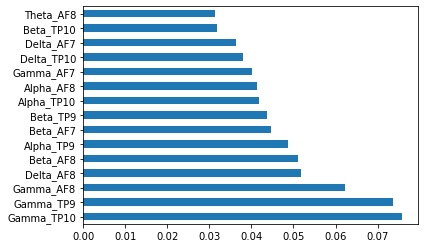

In [34]:
#plot graph of feature importances for better visualization
feat_importances= pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show

## Linear Discriminant Analysis

In [35]:
lda = LDA(n_components=1)
X_train = lda.fit_transform(x, y)
X_test = lda.transform(x)

## entropy base feature selection

In [45]:
from math import log, e

def entropy4(labels, base=None):
  value,counts = np.unique(labels, return_counts=True)
  norm_counts = counts / counts.sum()
  base = e if base is None else base
  return -(norm_counts * np.log(norm_counts)/np.log(base)).sum()

## need to get maximum
entropy =[]
wave =[]
for col in original_headers:
  print('entropy for {} = {}'.format(col,entropy4(x[col])))
  wave.append(col)
  entropy.append(entropy4(x[col]))

#print(entropy)
#print(wave)

import operator
min_list = sorted(zip(wave,entropy),key=lambda t:t[1])[5:]
#print(min_list)

## Correlation Matrix with Heatmap

Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated.

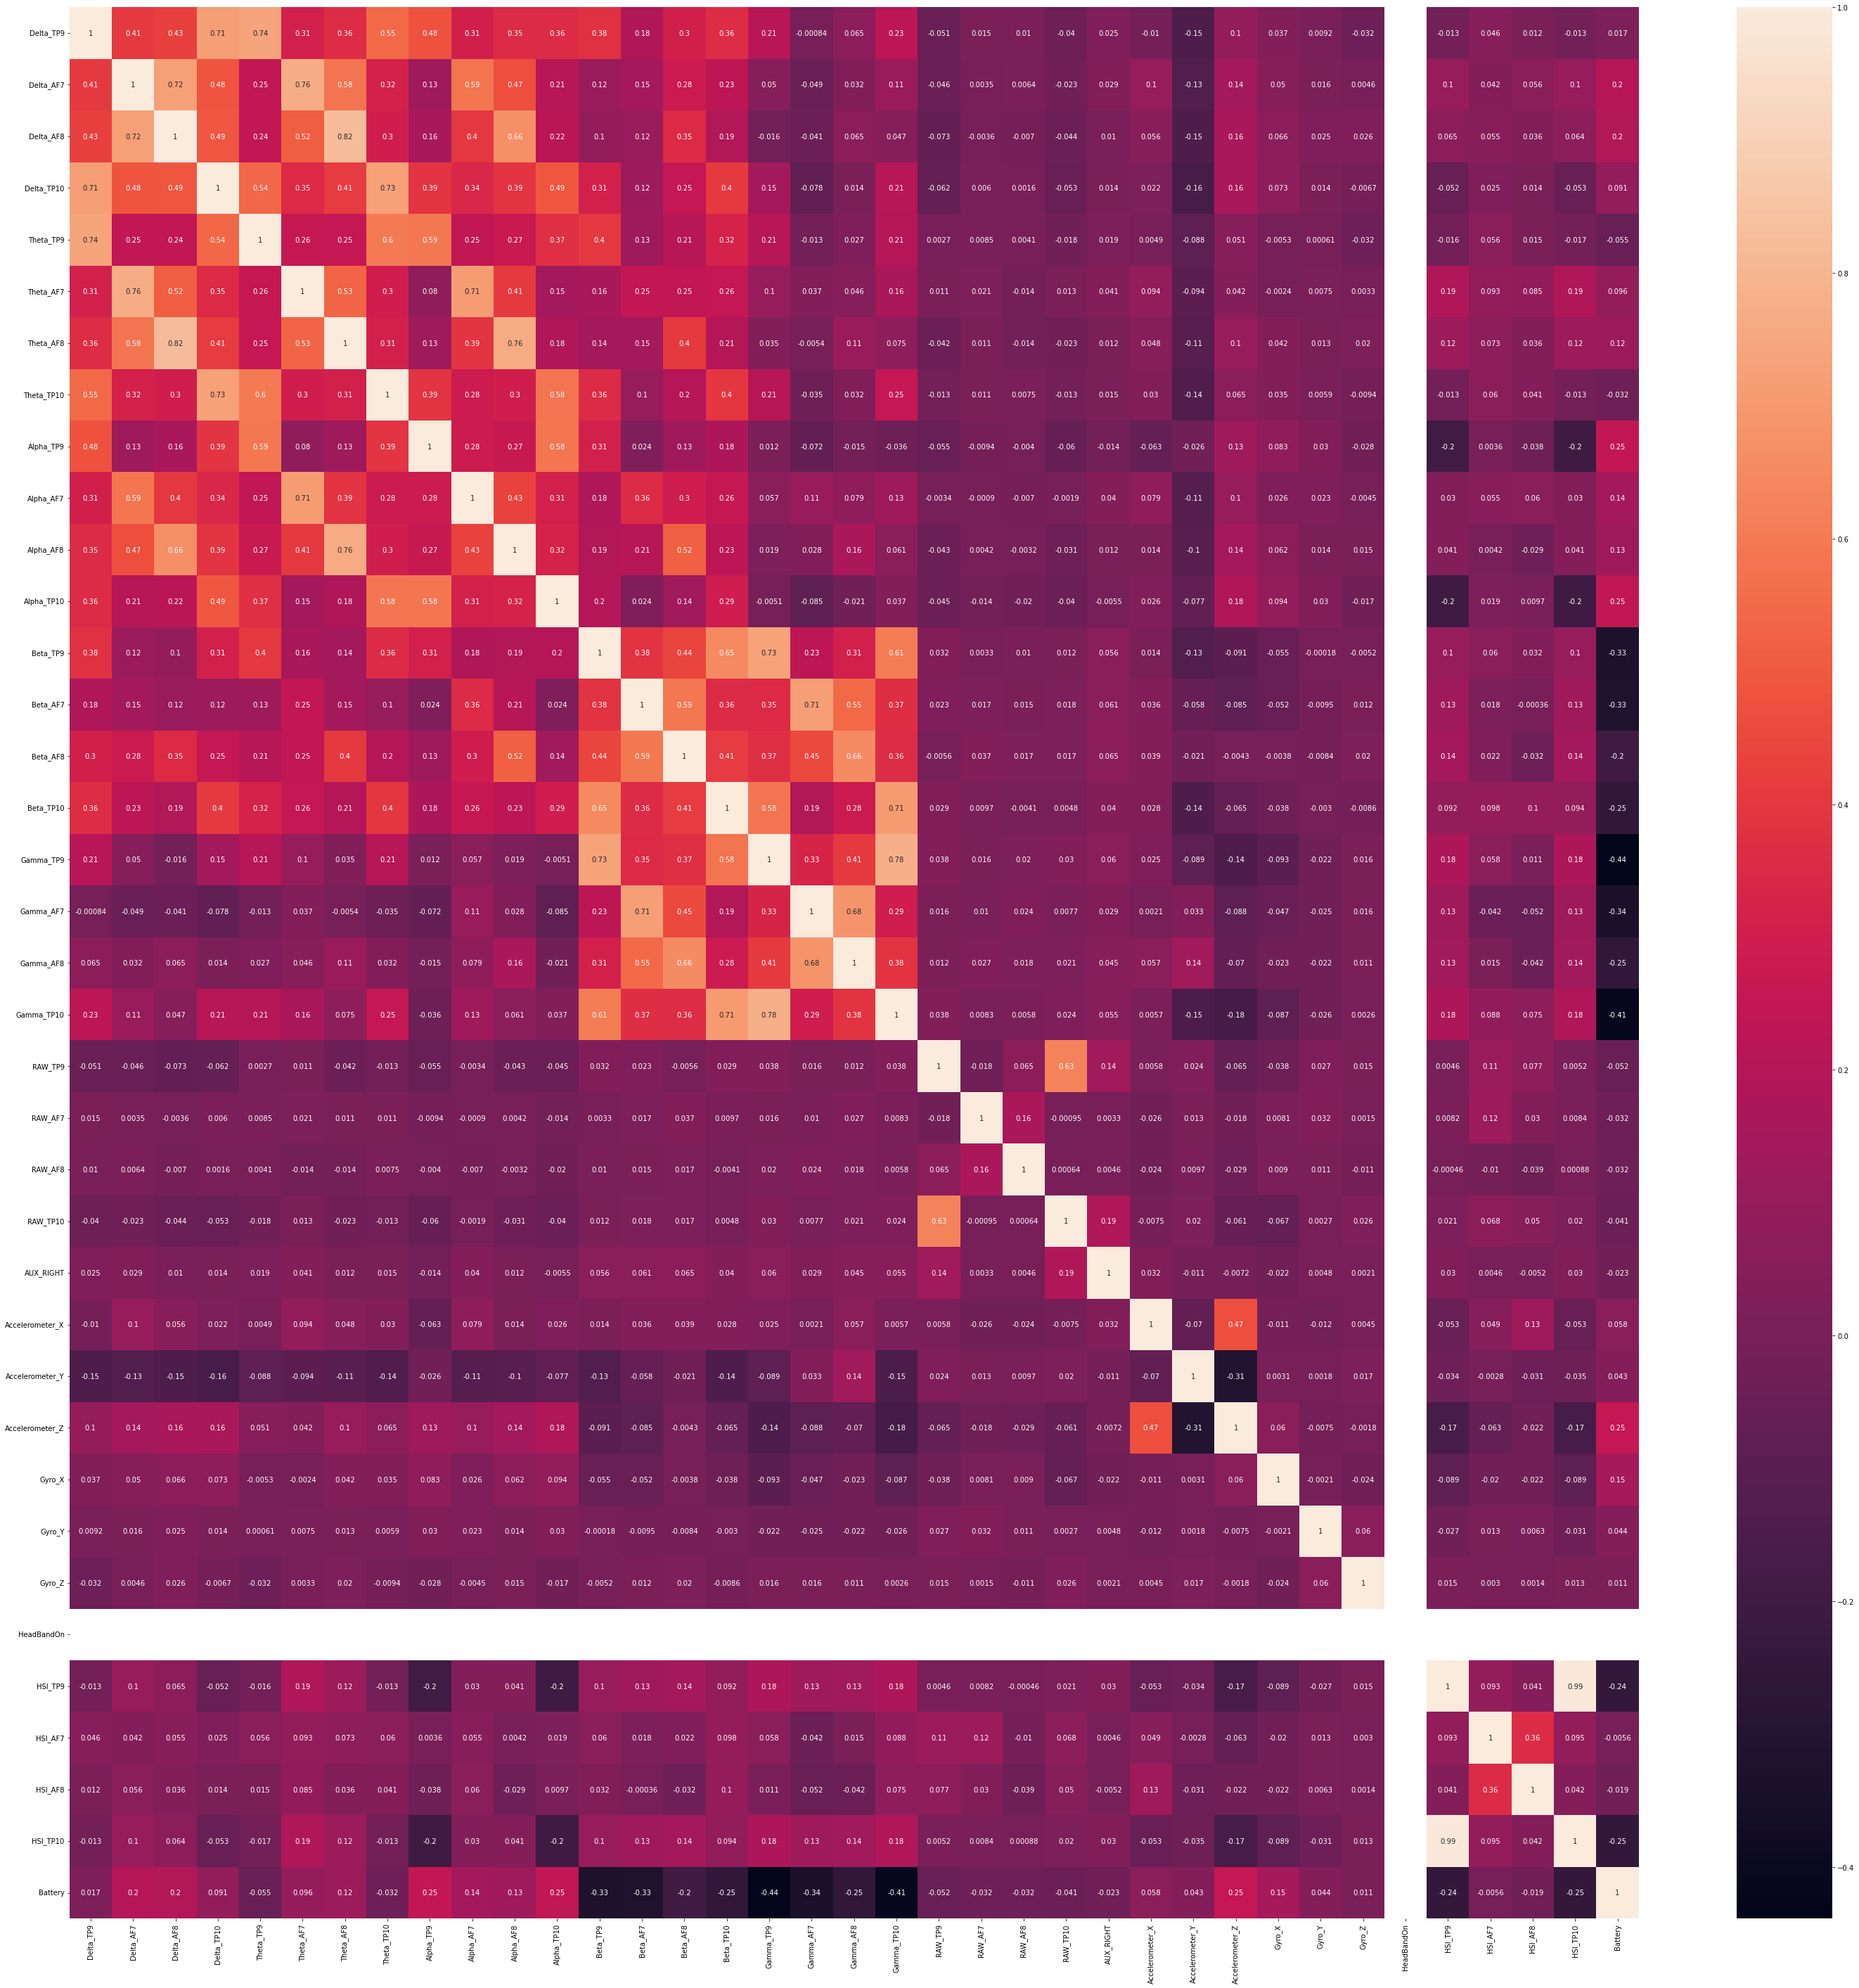

In [37]:
import seaborn as sns
corrmat= df.corr()
top_corr_features= corrmat.index
plt.figure(figsize=(50,50))
g= sns.heatmap(df[top_corr_features].corr(),annot=True)

In [40]:
corr = data_df.corr()
corr_y = abs(corr["Class"])
highest_corr = corr_y[corr_y <0.2]
highest_corr.sort_values(ascending=True)

Gamma_AF8     0.015416
Theta_AF7     0.020485
AUX_RIGHT     0.024384
RAW_AF8       0.026572
Theta_TP9     0.034894
RAW_AF7       0.048917
HSI_AF8       0.078355
HSI_AF7       0.083333
Theta_TP10    0.084715
Beta_AF8      0.085177
RAW_TP10      0.092678
RAW_TP9       0.121313
Gamma_AF7     0.130771
Alpha_AF7     0.152852
Beta_AF7      0.153111
Delta_TP9     0.165283
Beta_TP10     0.169126
Name: Class, dtype: float64